In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ['E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00023-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00024-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00025-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00027-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00029-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']#,'E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00031-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv','E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv']

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined1_df = dataframes[0]
for df in dataframes[1:]:
    combined1_df = combined1_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined1_file.csv'
combined1_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')


In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined1_file.csv\part-00000-868f6f4b-4b86-445f-a531-9ac2def0071f-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,41.567066,41.567066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.315032e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.808401,0.808401,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334389e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,2.475572,2.475572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.303769e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
3,0.049734,58.06,6.11,65.91,0.402143,0.402143,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,0.99,0.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,602.20,55.76,89.20,60.332022,10.484298,55.76,8.333182e+07,9.5,10.886830,14.840357,620.739807,0.19,141.55,DDoS-PSHACK_Flood
4,5.095550,180.36,5.94,63.36,0.644311,0.644311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,3.34,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.96,54.00,54.96,54.090864,0.273154,54.06,8.336254e+07,9.5,10.401036,0.386753,0.483918,0.16,141.55,DDoS-SynonymousIP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935407,0.000000,54.00,6.00,64.00,49.731488,49.731488,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.331430e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-PSHACK_Flood
935408,0.138592,23406.00,17.00,64.00,3739.483049,3739.483049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310228e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
935409,0.007363,58.62,5.76,61.44,9.986720,9.986720,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.03,0.06,0.00,0.96,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,571.96,54.12,56.92,54.512166,0.843745,54.91,8.333104e+07,9.5,10.440779,1.197507,5.541035,0.22,141.55,DDoS-PSHACK_Flood
935410,0.285180,105.36,6.00,63.58,4.806306,4.806306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.41,0.37,0.03,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,604.24,54.68,79.12,57.424584,6.865222,56.76,8.297241e+07,9.5,10.702805,9.716732,303.188877,0.19,141.55,DoS-SYN_Flood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            144272
DDoS-UDP_Flood             108908
DDoS-TCP_Flood              90300
DDoS-PSHACK_Flood           81694
DDoS-SYN_Flood              81448
DDoS-RSTFINFlood            80747
DDoS-SynonymousIP_Flood     72007
DoS-UDP_Flood               66164
DoS-TCP_Flood               53391
DoS-SYN_Flood               40638
BenignTraffic               21980
Mirai-greeth_flood          20022
Mirai-udpplain              17702
Mirai-greip_flood           15118
DDoS-ICMP_Fragmentation      9166
MITM-ArpSpoofing             6336
DDoS-UDP_Fragmentation       5781
DDoS-ACK_Fragmentation       5771
DNS_Spoofing                 3559
Recon-HostDiscovery          2707
Recon-OSScan                 1993
Recon-PortScan               1698
DoS-HTTP_Flood               1399
VulnerabilityScan             747
DDoS-HTTP_Flood               608
DDoS-SlowLoris                459
DictionaryBruteForce          252
BrowserHijacking              119
CommandInjection              107
SqlInjection  

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

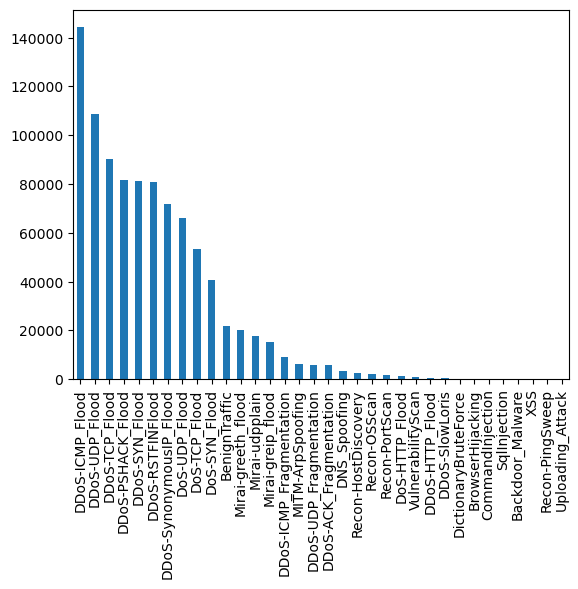

In [6]:
bar_graph('label')

In [7]:
df['label'].unique()

array(['DDoS-ICMP_Flood', 'DDoS-RSTFINFlood', 'DDoS-TCP_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-UDP_Flood',
       'DoS-TCP_Flood', 'Mirai-greeth_flood', 'DDoS-ICMP_Fragmentation',
       'DDoS-SYN_Flood', 'DDoS-ACK_Fragmentation', 'DoS-SYN_Flood',
       'Mirai-greip_flood', 'MITM-ArpSpoofing', 'BenignTraffic',
       'DoS-UDP_Flood', 'Mirai-udpplain', 'DDoS-UDP_Fragmentation',
       'Recon-PortScan', 'DoS-HTTP_Flood', 'Recon-HostDiscovery',
       'DNS_Spoofing', 'Recon-OSScan', 'DictionaryBruteForce',
       'SqlInjection', 'DDoS-SlowLoris', 'DDoS-HTTP_Flood',
       'CommandInjection', 'VulnerabilityScan', 'Recon-PingSweep',
       'BrowserHijacking', 'XSS', 'Backdoor_Malware', 'Uploading_Attack'],
      dtype=object)

In [8]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,41.567066,41.567066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.315032e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,6
1,0.000000,54.00,6.00,64.00,0.808401,0.808401,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.334389e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,9
2,0.000000,54.00,6.00,64.00,2.475572,2.475572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.303769e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,13
3,0.049734,58.06,6.11,65.91,0.402143,0.402143,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,0.99,0.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,602.20,55.76,89.20,60.332022,10.484298,55.76,8.333182e+07,9.5,10.886830,14.840357,620.739807,0.19,141.55,8
4,5.095550,180.36,5.94,63.36,0.644311,0.644311,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,3.34,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.96,54.00,54.96,54.090864,0.273154,54.06,8.336254e+07,9.5,10.401036,0.386753,0.483918,0.16,141.55,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935407,0.000000,54.00,6.00,64.00,49.731488,49.731488,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.00,0.00,0.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.331430e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,8
935408,0.138592,23406.00,17.00,64.00,3739.483049,3739.483049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310228e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,14
935409,0.007363,58.62,5.76,61.44,9.986720,9.986720,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.03,0.06,0.00,0.96,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,571.96,54.12,56.92,54.512166,0.843745,54.91,8.333104e+07,9.5,10.440779,1.197507,5.541035,0.22,141.55,8
935410,0.285180,105.36,6.00,63.58,4.806306,4.806306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.41,0.37,0.03,0.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,604.24,54.68,79.12,57.424584,6.865222,56.76,8.297241e+07,9.5,10.702805,9.716732,303.188877,0.19,141.55,19


In [9]:
x=df.drop(columns=['label'])
y=df['label']

In [10]:
y

0          6
1          9
2         13
3          8
4         12
          ..
935407     8
935408    14
935409     8
935410    19
935411    10
Name: label, Length: 935412, dtype: int32

In [11]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
x_train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
321315,0.000000,759.18,6.11,63.37,2.379411,2.379411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9807.24,383.24,1491.20,938.466368,540.989870,942.44,8.334071e+07,9.5,43.188694,765.031963,308134.701225,0.95,141.55
640987,1.810660,86.20,6.11,64.00,1.604389,1.604389,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,571.08,54.00,58.08,54.299160,1.053744,54.34,8.336123e+07,9.5,10.420831,1.492792,9.404093,0.12,141.55
786119,0.077176,28773.00,17.00,64.00,7986.958339,7986.958339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.312388e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55
842843,0.035184,59.94,6.11,64.00,3.297689,3.297689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,566.88,53.88,54.00,53.993673,0.026812,53.96,8.295626e+07,9.5,10.391685,0.038221,0.024351,0.03,141.55
757105,0.000000,0.00,1.00,64.00,254.169434,254.169434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.312464e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882371,0.000000,0.00,1.00,64.00,124.480991,124.480991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.312477e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55
152315,3.018923,108.00,6.00,64.00,0.662488,0.662488,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336210e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
117952,0.053643,41233.50,16.83,63.36,15643.366335,15643.366335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,526.30,50.00,51.30,50.100488,0.342997,50.10,8.302845e+07,9.5,10.010033,0.485827,0.922878,0.13,141.55
435829,0.000000,0.00,1.00,64.00,4.112963,4.112963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.314970e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55


In [13]:
y_train

321315     4
640987    12
786119    14
842843    20
757105     6
          ..
882371     6
152315    12
117952    21
435829     6
305711     6
Name: label, Length: 748329, dtype: int32

In [14]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 748329
Testing set: 187083


In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.8016441900119199
precision: 0.8095549939603033
recall:  0.8016441900119199
f1:  0.766235612654472


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9932436405231903
precision: 0.9929893892788261
recall:  0.9932436405231903
f1:  0.9927544195225998


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.6343922216342479
precision: 0.6655545262600219
recall:  0.6343922216342479
f1:  0.5657893375519228


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
print('accuracy', clf3.score(x_test,y_test))

pred=clf3.predict(x_test)

print('precision: ', precision_score(y_test,pred,average='weighted'))
print('recall: ', recall_score(y_test,pred,average='weighted'))
print('f1:', f1_score(y_test,pred,average='weighted'))

# neural network

In [19]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [20]:
Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(748329, 46)
(748329, 34)
(187083, 46)
(187083, 34)


In [22]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [23]:

input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(34, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [24]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/20
9344/9355 [============================>.] - ETA: 0s - loss: 0.4156 - accuracy: 0.8183
Epoch 1: val_accuracy improved from -inf to 0.76115, saving model to nn.hdf5
9355/9355 [==============================] - 17s 2ms/step - loss: 0.4154 - accuracy: 0.8183 - val_loss: 0.4635 - val_accuracy: 0.7611
Epoch 2/20
9328/9355 [============================>.] - ETA: 0s - loss: 0.1740 - accuracy: 0.9326
Epoch 2: val_accuracy improved from 0.76115 to 0.95326, saving model to nn.hdf5
9355/9355 [==============================] - 16s 2ms/step - loss: 0.1738 - accuracy: 0.9326 - val_loss: 0.1231 - val_accuracy: 0.9533
Epoch 3/20
9351/9355 [============================>.] - ETA: 0s - loss: 0.1165 - accuracy: 0.9548
Epoch 3: val_accuracy did not improve from 0.95326
9355/9355 [==============================] - 16s 2ms/step - loss: 0.1165 - accuracy: 0.9548 - val_loss: 0.1963 - val_accuracy: 0.9328
Epoch 4/20
9351/9355 [============================>.] - ETA: 0s - loss: 0.0942 - accuracy: 0.964

Text(0, 0.5, 'accuracy')

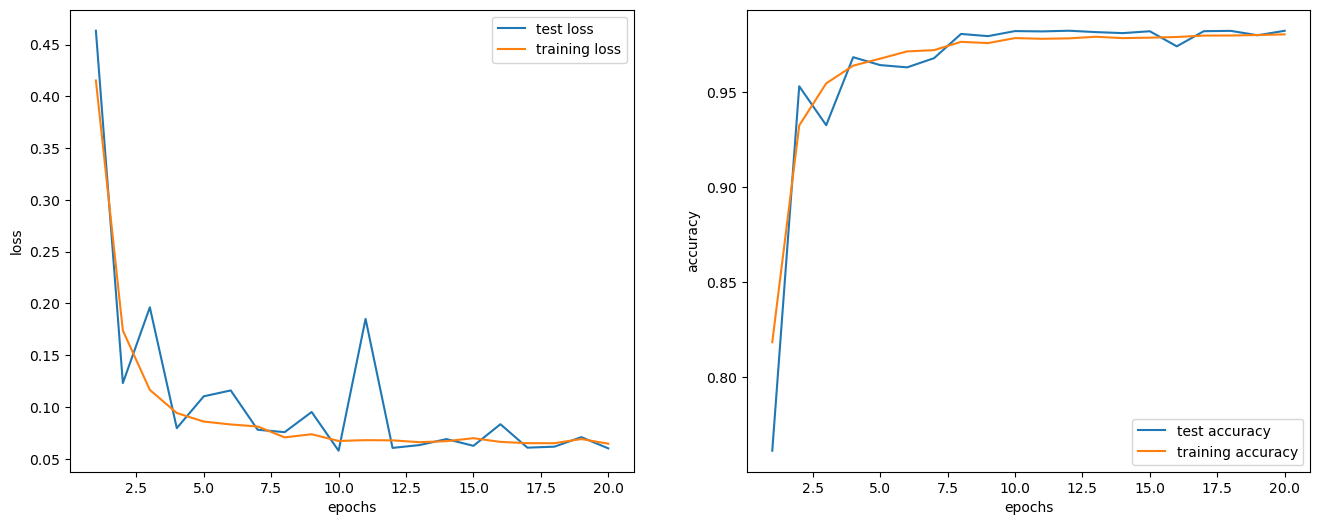

In [25]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,21,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,21,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,21,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,21,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [26]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))

5847/5847 [==============================] - 5s 810us/step
Precision score:  0.980381431318275
Recall score:  0.9824516391120519
F1 score:  0.9806955487082496


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
